In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

C:\Users\julia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\julia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\julia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\julia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\julia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 fro

In [2]:
data=pd.read_csv('existing-buildings-energy-water-efficiency-ebewe-program.csv')
data.head()

,BUILDING ADDRESS,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENERGY STAR CERTIFICATION - LAST APPROVAL DATE,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,...,PROGRAM YEAR,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),YEAR BUILT,AIN,LADBS Building Category
0,17819 MERRIDY ST,403904914860,130.2,COMPLIED,-38.8,-38.8,96.0,No,Not Available,Not Available,...,2017,Multifamily Housing,18.9,53.1,5020.2,18.9,53.1,1985.0,009,"50,000 to 99,999 sqft"
1,7654 LAUREL CANYON BLVD,441919899013,107.3,COMPLIED,-43.4,-43.4,99.0,No,Not Available,Not Available,...,2017,Multifamily Housing,24.9,59.3,6224.5,25.8,60.2,1985.0,038,"50,000 to 99,999 sqft"
2,7771 W FOOTHILL BLVD,470655916534,39.1,COMPLIED,3.0,3.0,Not Available,No,Not Available,Not Available,...,2017,Library,52.8,148.0,93.2,Not Available,Not Available,1995.0,901,"7,500 to 14,999 sqft (CITY OWNED BUILDING)"
3,22048 SHERMAN WAY,377827895980,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,048,"50,000 to 99,999 sqft"
4,1919 ARGYLE AVE,463105861126,251.4,COMPLIED,48.7,48.7,5.0,No,Not Available,Not Available,...,2018,Multifamily Housing,58.7,118.9,4323.1,Not Available,Not Available,1928.0,001,"50,000 to 99,999 sqft"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18181 entries, 0 to 18180
Data columns (total 28 columns):
BUILDING ADDRESS                                                   18181 non-null object
BUILDING ID                                                        18181 non-null object
CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)                         11200 non-null object
COMPLIANCE STATUS                                                  18181 non-null object
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI                       11200 non-null object
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI                         11200 non-null object
ENERGY STAR SCORE                                                  11200 non-null object
ENERGY STAR CERTIFICATION - ELIGIBILITY                            11200 non-null object
ENERGY STAR CERTIFICATION - LAST APPROVAL DATE                     11200 non-null object
ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED                      11200 non-null object
E

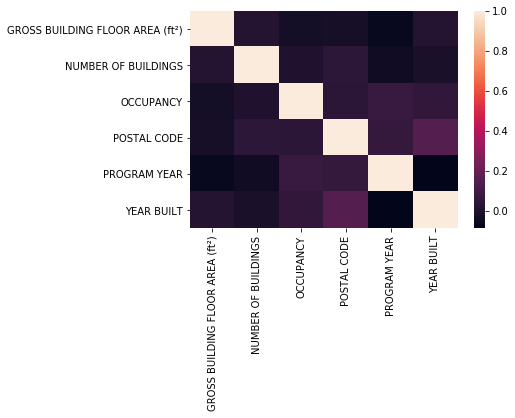

In [4]:
corr=data.corr()
corr
sns.heatmap(corr)


In [5]:
data.describe()

,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,OCCUPANCY,POSTAL CODE,PROGRAM YEAR,YEAR BUILT
count,1.120000e+04,11200.000000,11200.000000,18181.000000,18181.000000,11200.000000
mean,1.266883e+05,1.289018,93.169196,90558.809801,2017.561190,1976.952768
std,7.273577e+05,1.567354,16.883449,651.824502,0.675485,25.206942
min,0.000000e+00,0.000000,0.000000,90001.000000,2016.000000,1190.000000
25%,2.982100e+04,1.000000,95.000000,90024.000000,2017.000000,1964.000000
50%,6.107600e+04,1.000000,100.000000,90057.000000,2018.000000,1980.000000
75%,1.261040e+05,1.000000,100.000000,91335.000000,2018.000000,1992.000000
max,7.093735e+07,32.000000,100.000000,92806.000000,2018.000000,2019.000000


In [6]:
data.columns

Index(['BUILDING ADDRESS', 'BUILDING ID',
       'CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)', 'COMPLIANCE STATUS',
       '% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI',
       '% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI', 'ENERGY STAR SCORE',
       'ENERGY STAR CERTIFICATION - ELIGIBILITY',
       'ENERGY STAR CERTIFICATION - LAST APPROVAL DATE',
       'ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED',
       'ENTITY RESPONSIBLE FOR BENCHMARK', 'GROSS BUILDING FLOOR AREA (ft²)',
       'INDOOR WATER USE (kgal)', 'INDOOR WATER USE INTENSITY (gal/ft²)',
       'NUMBER OF BUILDINGS', 'OCCUPANCY', 'OUTDOOR WATER USE (kgal)',
       'POSTAL CODE', 'PROGRAM YEAR', 'PROPERTY TYPE',
       'SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)', 'Source EUI (kBtu/ft²)',
       'TOTAL WATER USE (kgal)',
       'WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)',
       'WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)',
       'YEAR BUILT', 'AIN', 'LADBS Building Category'],
 

In [7]:
data=data.drop(['BUILDING ADDRESS', 'BUILDING ID',
       'COMPLIANCE STATUS',
       'ENERGY STAR CERTIFICATION - LAST APPROVAL DATE',
       'ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED',
       'ENTITY RESPONSIBLE FOR BENCHMARK','POSTAL CODE',
       'PROGRAM YEAR',
       'WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)',
       'WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)',
       'YEAR BUILT','AIN', 'LADBS Building Category'],axis=1)

In [8]:
data.head()

,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,GROSS BUILDING FLOOR AREA (ft²),INDOOR WATER USE (kgal),INDOOR WATER USE INTENSITY (gal/ft²),NUMBER OF BUILDINGS,OCCUPANCY,OUTDOOR WATER USE (kgal),PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal)
0,130.2,-38.8,-38.8,96.0,No,97547.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,18.9,53.1,5020.2
1,107.3,-43.4,-43.4,99.0,No,63821.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,24.9,59.3,6224.5
2,39.1,3.0,3.0,Not Available,No,10500.0,Not Available,Not Available,1.0,100.0,Not Available,Library,52.8,148.0,93.2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,251.4,48.7,48.7,5.0,No,68230.0,Not Available,Not Available,1.0,100.0,Not Available,Multifamily Housing,58.7,118.9,4323.1


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data.columns

Index(['CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)',
       '% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI',
       '% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI', 'ENERGY STAR SCORE',
       'ENERGY STAR CERTIFICATION - ELIGIBILITY',
       'GROSS BUILDING FLOOR AREA (ft²)', 'INDOOR WATER USE (kgal)',
       'INDOOR WATER USE INTENSITY (gal/ft²)', 'NUMBER OF BUILDINGS',
       'OCCUPANCY', 'OUTDOOR WATER USE (kgal)', 'PROPERTY TYPE',
       'SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)', 'Source EUI (kBtu/ft²)',
       'TOTAL WATER USE (kgal)'],
      dtype='object')

In [11]:
data.shape

(18181, 15)

In [12]:
data['TOTAL WATER USE (kgal)']=data['TOTAL WATER USE (kgal)'].replace('Not Available',np.nan)

In [13]:
data=data.dropna(subset=['TOTAL WATER USE (kgal)'])

In [14]:
data.shape

(10183, 15)

In [15]:
data.head(10)

,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,GROSS BUILDING FLOOR AREA (ft²),INDOOR WATER USE (kgal),INDOOR WATER USE INTENSITY (gal/ft²),NUMBER OF BUILDINGS,OCCUPANCY,OUTDOOR WATER USE (kgal),PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal)
0,130.2,-38.8,-38.8,96.0,No,97547.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,18.9,53.1,5020.2
1,107.3,-43.4,-43.4,99.0,No,63821.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,24.9,59.3,6224.5
2,39.1,3.0,3.0,Not Available,No,10500.0,Not Available,Not Available,1.0,100.0,Not Available,Library,52.8,148.0,93.2
4,251.4,48.7,48.7,5.0,No,68230.0,Not Available,Not Available,1.0,100.0,Not Available,Multifamily Housing,58.7,118.9,4323.1
5,107.5,-15.0,-15.0,73.0,No,48388.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,36.2,68.0,1372.9
6,775.0,-11.3,-11.3,64.0,No,150962.0,8073.5,53.48,1.0,60.0,Not Available,Hotel,77.7,174.4,8073.5
8,116.3,Not Available,Not Available,Not Available,No,71000.0,Not Available,Not Available,1.0,100.0,Not Available,Manufacturing/Industrial Plant,21.6,67.8,450.3
9,275.6,-25.2,-25.2,86.0,No,201000.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,18.1,56.8,4819.0
11,4.7,-83.1,-83.1,Not Available,No,12400.0,Not Available,Not Available,1.0,100.0,Not Available,Other,5.4,15.1,23.9
12,1105.6,35.2,35.2,8.0,No,423801.0,Not Available,Not Available,1.0,100.0,Not Available,Multifamily Housing,37.0,98.1,10547.5


In [16]:
# Reset the index...

data.reset_index()

,index,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,GROSS BUILDING FLOOR AREA (ft²),INDOOR WATER USE (kgal),INDOOR WATER USE INTENSITY (gal/ft²),NUMBER OF BUILDINGS,OCCUPANCY,OUTDOOR WATER USE (kgal),PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal)
0,0,130.2,-38.8,-38.8,96.0,No,97547.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,18.9,53.1,5020.2
1,1,107.3,-43.4,-43.4,99.0,No,63821.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,24.9,59.3,6224.5
2,2,39.1,3.0,3.0,Not Available,No,10500.0,Not Available,Not Available,1.0,100.0,Not Available,Library,52.8,148.0,93.2
3,4,251.4,48.7,48.7,5.0,No,68230.0,Not Available,Not Available,1.0,100.0,Not Available,Multifamily Housing,58.7,118.9,4323.1
4,5,107.5,-15.0,-15.0,73.0,No,48388.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,36.2,68.0,1372.9
5,6,775.0,-11.3,-11.3,64.0,No,150962.0,8073.5,53.48,1.0,60.0,Not Available,Hotel,77.7,174.4,8073.5
6,8,116.3,Not Available,Not Available,Not Available,No,71000.0,Not Available,Not Available,1.0,100.0,Not Available,Manufacturing/Industrial Plant,21.6,67.8,450.3
7,9,275.6,-25.2,-25.2,86.0,No,201000.0,Not Available,Not Available,1.0,95.0,Not Available,Multifamily Housing,18.1,56.8,4819.0
8,11,4.7,-83.1,-83.1,Not Available,No,12400.0,Not Available,Not Available,1.0,100.0,Not Available,Other,5.4,15.1,23.9
9,12,1105.6,35.2,35.2,8.0,No,423801.0,Not Available,Not Available,1.0,100.0,Not Available,Multifamily Housing,37.0,98.1,10547.5


In [17]:
# 'INDOOR WATER USE INTENSITY (gal/ft²)','INDOOR WATER USE (kgal)','OUTDOOR WATER USE (kgal)'.
# 'SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)','Source EUI (kBtu/ft²)'.

data['Source EUI (kBtu/ft²)'].value_counts()

Not Available    260
118.9            249
157.4            235
67.2              70
75.8              61
44.7              33
68.8              28
52.9              26
95.5              24
37.6              22
0.0               19
69.6              18
37.7              17
82.7              15
62.0              15
82.2              15
130.2             15
69.4              15
28.9              14
5.7               14
6.4               14
108.5             14
74.4              14
74.2              13
92.1              13
84.0              13
73.0              13
9.3               13
54.1              13
6.2               13
                ... 
252.8              1
274.1              1
1167.4             1
288.1              1
325.2              1
185.6              1
235.6              1
233.0              1
351.6              1
225.7              1
142.9              1
555.5              1
769.7              1
124.4              1
1527.2             1
520.5              1
185.3        

In [18]:
data=data.drop(['INDOOR WATER USE INTENSITY (gal/ft²)','INDOOR WATER USE (kgal)','OUTDOOR WATER USE (kgal)'],axis=1)

In [19]:
data.shape

(10183, 12)

In [20]:
data=data.replace('Not Available',np.nan)

In [21]:
data.isna().sum()

CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)       212
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI     984
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI       984
ENERGY STAR SCORE                               3730
ENERGY STAR CERTIFICATION - ELIGIBILITY           58
GROSS BUILDING FLOOR AREA (ft²)                    0
NUMBER OF BUILDINGS                                0
OCCUPANCY                                          0
PROPERTY TYPE                                      0
SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)       260
Source EUI (kBtu/ft²)                            260
TOTAL WATER USE (kgal)                             0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10183 entries, 0 to 18180
Data columns (total 12 columns):
CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)      9971 non-null object
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI    9199 non-null object
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI      9199 non-null object
ENERGY STAR SCORE                               6453 non-null object
ENERGY STAR CERTIFICATION - ELIGIBILITY         10125 non-null object
GROSS BUILDING FLOOR AREA (ft²)                 10183 non-null float64
NUMBER OF BUILDINGS                             10183 non-null float64
OCCUPANCY                                       10183 non-null float64
PROPERTY TYPE                                   10183 non-null object
SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)      9923 non-null object
Source EUI (kBtu/ft²)                           9923 non-null object
TOTAL WATER USE (kgal)                          10183 non-null object
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [23]:
obj_flt=['CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)','% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI',
         '% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI','ENERGY STAR SCORE','SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)',
        'Source EUI (kBtu/ft²)','TOTAL WATER USE (kgal)']

for i in obj_flt:
    data[i]=data[i].astype('float64')     # converting object to float...


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10183 entries, 0 to 18180
Data columns (total 12 columns):
CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)      9971 non-null float64
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI    9199 non-null float64
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI      9199 non-null float64
ENERGY STAR SCORE                               6453 non-null float64
ENERGY STAR CERTIFICATION - ELIGIBILITY         10125 non-null object
GROSS BUILDING FLOOR AREA (ft²)                 10183 non-null float64
NUMBER OF BUILDINGS                             10183 non-null float64
OCCUPANCY                                       10183 non-null float64
PROPERTY TYPE                                   10183 non-null object
SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)      9923 non-null float64
Source EUI (kBtu/ft²)                           9923 non-null float64
TOTAL WATER USE (kgal)                          10183 non-null float64
dtypes: float64(10), object(2)
memory usage: 1.

In [25]:
cat_col=data.select_dtypes(include='object').columns

In [26]:
cont_col=data.select_dtypes(exclude='object').columns

In [27]:
for i in cat_col:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [28]:
for i in cont_col:
    data[i].fillna(data[i].mean(),inplace=True)

In [29]:
data.isna().sum()

CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)      0
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI    0
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI      0
ENERGY STAR SCORE                               0
ENERGY STAR CERTIFICATION - ELIGIBILITY         0
GROSS BUILDING FLOOR AREA (ft²)                 0
NUMBER OF BUILDINGS                             0
OCCUPANCY                                       0
PROPERTY TYPE                                   0
SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)      0
Source EUI (kBtu/ft²)                           0
TOTAL WATER USE (kgal)                          0
dtype: int64

In [30]:
data=pd.get_dummies(data)

In [31]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data=pd.DataFrame(sc.fit_transform(data),columns=data.columns)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
data.shape

(10183, 84)

In [33]:
data.head(10)

,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,OCCUPANCY,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),...,PROPERTY TYPE_Senior Care Community,PROPERTY TYPE_Social/Meeting Hall,PROPERTY TYPE_Stadium (Open),PROPERTY TYPE_Strip Mall,PROPERTY TYPE_Supermarket/Grocery Store,PROPERTY TYPE_Transportation Terminal/Station,PROPERTY TYPE_Veterinary Office,PROPERTY TYPE_Vocational School,PROPERTY TYPE_Wholesale Club/Supercenter,PROPERTY TYPE_Worship Facility
0,-0.030749,-0.044777,-0.044777,1.196640,-0.039615,-0.182066,0.072209,-0.041053,-0.034282,-0.045743,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
1,-0.031642,-0.046449,-0.046449,1.310960,-0.085057,-0.182066,0.072209,-0.038593,-0.033337,-0.037554,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
2,-0.034302,-0.029582,-0.029582,0.000000,-0.156901,-0.182066,0.397565,-0.027156,-0.019819,-0.079242,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
3,-0.026021,-0.012970,-0.012970,-2.271092,-0.079116,-0.182066,0.397565,-0.024738,-0.024254,-0.050482,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
4,-0.031634,-0.036125,-0.036125,0.320180,-0.105851,-0.182066,0.072209,-0.033961,-0.032011,-0.070541,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
5,-0.005596,-0.034780,-0.034780,-0.022783,0.032356,-0.182066,-2.205281,-0.016949,-0.015795,-0.024983,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
6,-0.031291,0.000000,0.000000,0.000000,-0.075384,-0.182066,0.397565,-0.039946,-0.032042,-0.076814,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
7,-0.025077,-0.039833,-0.039833,0.815570,0.099776,-0.182066,0.072209,-0.041381,-0.033718,-0.047111,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
8,-0.035644,-0.060880,-0.060880,0.000000,-0.154341,-0.182066,0.397565,-0.046587,-0.040073,-0.079713,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383
9,0.007301,-0.017877,-0.017877,-2.156772,0.399976,-0.182066,0.397565,-0.033633,-0.027424,-0.008161,...,-0.070948,-0.017167,-0.017167,-0.091201,-0.096005,-0.062005,-0.017167,-0.024281,-0.058728,-0.081383


In [42]:
# Linear Regression...

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

x=data.drop(['TOTAL WATER USE (kgal)'],axis=1)
y=data['TOTAL WATER USE (kgal)']

In [35]:
data['TOTAL WATER USE (kgal)'].dtype

dtype('float64')

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=200)

lr=LinearRegression()

In [37]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
ypred=lr.predict(xtest)

In [39]:
ypred

array([-0.01269531, -0.05664062, -0.08422852, ..., -0.02880859,
        0.08154297, -0.04199219])

In [40]:
print(metrics.r2_score(y,lr.predict(x)))

-4.2862574114807274e+26


In [41]:
from sklearn.linear_model import Lasso,Ridge

In [43]:
ls = Lasso()
Rd = Ridge()

In [44]:
ls.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(metrics.r2_score(y,lr.predict(x)))
print(metrics.)

-4.2862574114807274e+26


In [45]:
Rd.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(metrics.r2_score(y,lr.predict(x)))

-4.2862574114807274e+26


In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [49]:
LR=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=3)
bag_knn=BaggingRegressor(base_estimator=knn,n_estimators=30,random_state=0)

# Base estimator is Decision Tree as as a regressor
bag_dt=BaggingRegressor(n_estimators=51,random_state=0)
boost_dt=AdaBoostRegressor(n_estimators=51,random_state=0)

bag_LR=BaggingRegressor(base_estimator=LR,n_estimators=50,random_state=0)
boost_LR=AdaBoostRegressor(base_estimator=LR,n_estimators = 50,random_state=0)

gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [55]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,bag_LR,boost_LR,bag_dt,boost_dt,knn,bag_knn,gboost],
        ['LinearReg','BaggedLR','BoostedLR','BaggedDT','BoostedDT','KNN','BaggedKNN','GradientBoost']):
    rmse=[]
    for train,test in kf.split(x,y):
        Xtrain,Xtest=x.iloc[train,:],x.iloc[test,:]
        Ytrain,Ytest=y[train],y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #mse=np.sum((Ytest-Y_predict)**2)/len(Ytest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse), np.var(rmse,ddof=1), name ))  

RMSE scores: 194417675055.71 (+/- 64193177567787241963520.00000) [LinearReg]
RMSE scores: 678627185915.72 (+/- 137794221368339043713024.00000) [BaggedLR]
RMSE scores: 505116.66 (+/- 539173251471.95636) [BoostedLR]
RMSE scores: 0.95 (+/- 0.08842) [BaggedDT]
RMSE scores: 1.86 (+/- 0.37739) [BoostedDT]
RMSE scores: 1.14 (+/- 0.08740) [KNN]
RMSE scores: 1.07 (+/- 0.09368) [BaggedKNN]
RMSE scores: 0.97 (+/- 0.08709) [GradientBoost]
